In [86]:
import numpy as np
import xarray as xr
import datetime
import os
try:
    os.chdir(os.path.join(os.getcwd(),'bathymetry_checks') )# 
    print(os.getcwd())
except:
    pass

import sys
sys.path.append('../')
from postprocessing import tideanalysis

In [85]:
datafolder='CHSdata'
tstafile='CHSTG.xyn'  #file of all the TG stations in the regional model domain.
tstaposdata=np.loadtxt(tstafile,usecols=(0,1),dtype='float')
tstanamdata=np.loadtxt(tstafile,usecols=(2),dtype='str',delimiter='\t')

In [ ]:
sdate='2020-01-01T00:00:00Z'  # sdate of all data
edate='2021-01-01T00:00:00Z'  # end date of all data.

In [94]:
j=0
tideconst='M2'
M2am=[];M2ph=[]
data={}
for station in tstanamdata:
    staname=station[1:-1]
    print(staname)
    a=np.array([i[:-3] for i in os.listdir(datafolder)],dtype='str')
    i=np.where(a==staname)
    print(i)
    stafile=os.path.join(datafolder,os.listdir(datafolder)[i[0][0]])
    stawldata=np.loadtxt(stafile,usecols=(1),dtype='float',skiprows=2)
    statimdata=np.loadtxt(stafile,usecols=(0),dtype='str',skiprows=2)
    stattimtrdata=[datetime.datetime.strptime(i,"%Y-%m-%dT%H:%M:%SZ") for i in statimdata]
    data['time']=stattimtrdata
    data['h']=stawldata
    data['lon']=[tstaposdata[j,0]]
    data['lat']=[tstaposdata[j,1]]
    (Am,Ph)= tideanalysis.compute1stationtidal(data,tideconst)
    M2am=np.append(M2am,Am)
    M2ph=np.append(M2ph,Ph)
    j+=1
    

Sachs Harbour
(array([455]),)
solve: matrix prep ... solution ... done.
Pearce Point
(array([362]),)
solve: matrix prep ... solution ... done.
Cape Parry
(array([271]),)
solve: matrix prep ... solution ... done.
Kugluktuk
(array([779]),)
solve: matrix prep ... solution ... done.
Winter Harbour
(array([499]),)
solve: matrix prep ... solution ... done.
Tysoe Point
(array([689]),)
solve: matrix prep ... solution ... done.
Paulatuk
(array([772]),)
solve: matrix prep ... solution ... done.
Bernard Harbour
(array([431]),)
solve: matrix prep ... solution ... done.
Franklin Bay
(array([24]),)
solve: matrix prep ... solution ... done.
Peel Point
(array([154]),)
solve: matrix prep ... solution ... done.
Baillie Is. (South Spit)
(array([470]),)
solve: matrix prep ... solution ... done.
Austin Bay
(array([239]),)
solve: matrix prep ... solution ... done.
Tuktoyaktuk
(array([328]),)
solve: matrix prep ... solution ... done.
Natkusiak Peninsula
(array([185]),)
solve: matrix prep ... solution ... don

In [100]:
selectstation={'M2amp':(("stations"),M2am),'M2ph':(("stations"),M2ph),'stationname':tstanamdata,'Lon':tstaposdata[:,0],'Lat':tstaposdata[:,1]}
coords={"stations": np.linspace(1,len(tstanamdata),len(tstanamdata))}
ds=xr.Dataset(selectstation,coords=coords)
ds.to_netcdf('TGCHS_RC_M2.nc')

In [96]:
m2data=xr.open_dataset('TGCHS_RC_M2.nc')
m2data.info()

xarray.Dataset {
dimensions:
	Lat = 156 ;
	Lon = 156 ;
	stationname = 156 ;
	stations = 156 ;

variables:
	float64 M2amp(stations) ;
	float64 M2ph(stations) ;
	object stationname(stationname) ;
	float64 Lon(Lon) ;
	float64 Lat(Lat) ;
	float64 stations(stations) ;

// global attributes:
}

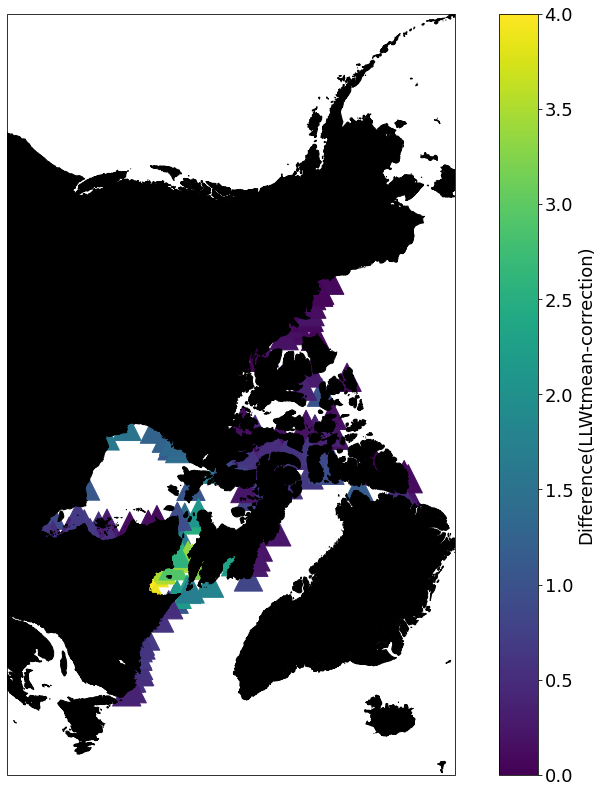

In [99]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cpf 
   
# marking the x-axis and y-axis 

fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())
# ax.set_extent([-180,180,45,90]) 
cbarlabel='Difference(LLWtmean-correction)' 
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
# contour_opts = {'levels': np.linspace(0,8,50),
#                 'cmap':'viridis','transform':ccrs.PlateCarree(),'alpha':1}
# cont=ax1.tricontour(triang,scorrval,**contour_opts)
# fig.colorbar(cont)
cont1=ax1.scatter(m2data.Lon,m2data.Lat,c=m2data.M2amp,transform=ccrs.PlateCarree(),cmap='viridis',marker='^',s=800,vmin=0,vmax=4.0)
cbar=fig.colorbar(cont1,fraction=0.078, pad=0.04)
cbar.set_label(cbarlabel, rotation=90, fontsize=18)
cbar.ax.tick_params(labelsize=18)
plt.show()